## Create Latitude and Longitude Combinations

In [157]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

In [158]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [159]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [160]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

## Get the City Weather Data

#### Import Dependencies, and Initialize an Empty List and Counters

In [161]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [162]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791


In [163]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791&q=Boston


In [164]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [165]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL. Loop through all the cities in the list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
     #   set_count += 1
     #   record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + "i"


# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities
# and retrieve both the index, and the city from the list.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
        # Run an API request for each of the cities.       
# Add a try-except block to our code to prevent the API request from stopping prematurely
# if the city_weather request isn't a valid response.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | uchiza
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | rungata
City not found. Skipping...
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | boden
Processing Record 12 of Set 1 | jinxiang
Processing Record 13 of Set 1 | hihifo
City not found. Skipping...
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | fukue
Processing Record 16 of Set 1 | sola
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | anloga
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | valparaiso
Pr

Processing Record 34 of Set 4 | krasnogorsk
Processing Record 35 of Set 4 | los llanos de aridane
Processing Record 36 of Set 4 | ichchapuram
Processing Record 37 of Set 4 | jalu
Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | puerto escondido
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | sindang
Processing Record 44 of Set 4 | roald
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | lebanon
Processing Record 48 of Set 4 | sinnamary
Processing Record 49 of Set 4 | medea
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | gorontalo
Processing Record 2 of Set 5 | lozovo
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | umm lajj
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | hasaki
Processi

City not found. Skipping...
Processing Record 18 of Set 8 | ilhabela
Processing Record 19 of Set 8 | kirovskiy
Processing Record 20 of Set 8 | high rock
Processing Record 21 of Set 8 | rocha
Processing Record 22 of Set 8 | taoudenni
Processing Record 23 of Set 8 | samusu
City not found. Skipping...
Processing Record 24 of Set 8 | anchorage
Processing Record 25 of Set 8 | cooma
Processing Record 26 of Set 8 | druskininkai
Processing Record 27 of Set 8 | takoradi
Processing Record 28 of Set 8 | invermere
Processing Record 29 of Set 8 | rusape
Processing Record 30 of Set 8 | prokopyevsk
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | havre
Processing Record 33 of Set 8 | darlawn
Processing Record 34 of Set 8 | ayagoz
Processing Record 35 of Set 8 | coihaique
Processing Record 36 of Set 8 | wanaka
Processing Record 37 of Set 8 | venice
Processing Record 38 of Set 8 | kamaishi
Processing Record 39 of Set 8 | general roca
Processing Record 40 of Set 8 | touros
Pr

Processing Record 5 of Set 12 | lagoa
Processing Record 6 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 12 | oliveira
Processing Record 8 of Set 12 | mayumba
Processing Record 9 of Set 12 | tolaga bay
Processing Record 10 of Set 12 | boyolangu
Processing Record 11 of Set 12 | punto fijo
Processing Record 12 of Set 12 | buin
Processing Record 13 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 14 of Set 12 | atherton
Processing Record 15 of Set 12 | praia
Processing Record 16 of Set 12 | pokhara
Processing Record 17 of Set 12 | mandalgovi
Processing Record 18 of Set 12 | bay roberts
Processing Record 19 of Set 12 | at-bashi
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | ambon
Processing Record 22 of Set 12 | te anau
Processing Record 23 of Set 12 | la paz
Processing Record 24 of Set 12 | linxia
Processing Record 25 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of S

In [166]:
# Tally the number of cities in the city_data array of dictionaries using the len() function.

print ("Number of cities in array of dictionaries = ", len( city_data))

Number of cities in array of dictionaries =  552



## Create a DataFrame of City Weather Data

In [167]:
# Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,33.93,134.50,59.00,66,40,10.29,JP,2019-11-06 00:16:32
1,Butaritari,3.07,172.79,84.04,76,1,11.74,KI,2019-11-06 00:16:33
2,Vostok,46.45,135.83,15.40,85,100,8.66,RU,2019-11-06 00:16:33
3,Punta Arenas,-53.16,-70.91,41.00,100,75,9.17,CL,2019-11-06 00:16:33
4,Cabo San Lucas,22.89,-109.91,84.99,65,40,12.75,MX,2019-11-06 00:15:11
5,Uchiza,-8.46,-76.46,66.87,94,67,4.79,PE,2019-11-06 00:16:34
6,Hilo,19.71,-155.08,84.20,66,1,9.17,US,2019-11-06 00:16:35
7,Avarua,-21.21,-159.78,75.20,73,100,4.70,CK,2019-11-06 00:16:35
8,Jamestown,-33.21,138.60,68.61,33,13,17.60,AU,2019-11-06 00:16:35
9,Boden,65.83,21.69,10.40,92,22,5.82,SE,2019-11-06 00:16:35


In [168]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# Assign a new or the same DataFrame with new column order: df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2019-11-06 00:16:32,33.93,134.50,59.00,66,40,10.29
1,Butaritari,KI,2019-11-06 00:16:33,3.07,172.79,84.04,76,1,11.74
2,Vostok,RU,2019-11-06 00:16:33,46.45,135.83,15.40,85,100,8.66
3,Punta Arenas,CL,2019-11-06 00:16:33,-53.16,-70.91,41.00,100,75,9.17
4,Cabo San Lucas,MX,2019-11-06 00:15:11,22.89,-109.91,84.99,65,40,12.75
5,Uchiza,PE,2019-11-06 00:16:34,-8.46,-76.46,66.87,94,67,4.79
6,Hilo,US,2019-11-06 00:16:35,19.71,-155.08,84.20,66,1,9.17
7,Avarua,CK,2019-11-06 00:16:35,-21.21,-159.78,75.20,73,100,4.70
8,Jamestown,AU,2019-11-06 00:16:35,-33.21,138.60,68.61,33,13,17.60
9,Boden,SE,2019-11-06 00:16:35,65.83,21.69,10.40,92,22,5.82


In [169]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Plot Latitude vs. Temperature


##### Get Data for Plotting 

In [170]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [171]:
# Convert the above JSON datestamp using the string format method, strftime() 
# and pass the formatting parameters for our date in parentheses.
import time

today = time.strftime("%x")
today

'11/05/19'

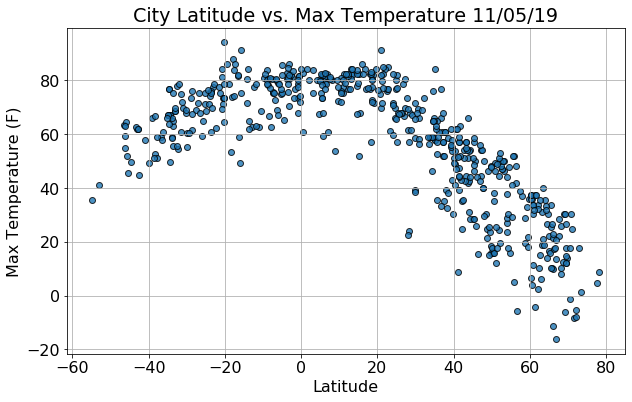

In [172]:
# Build the scatter plot for latitude vs. max temperature.
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## Plot Latitude vs. Humidity

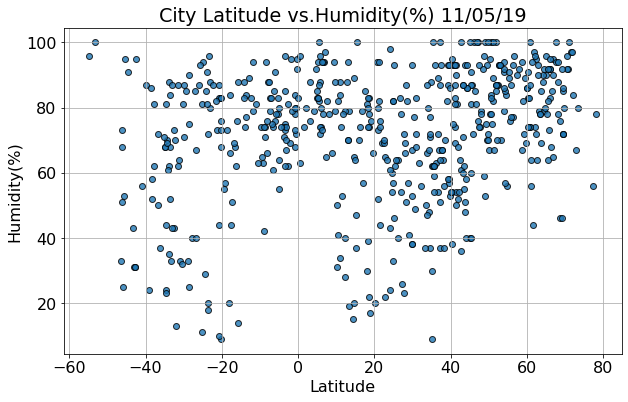

In [173]:
# Build the scatter plot for latitude vs. humidity.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## Plot Latitude vs. Cloudiness

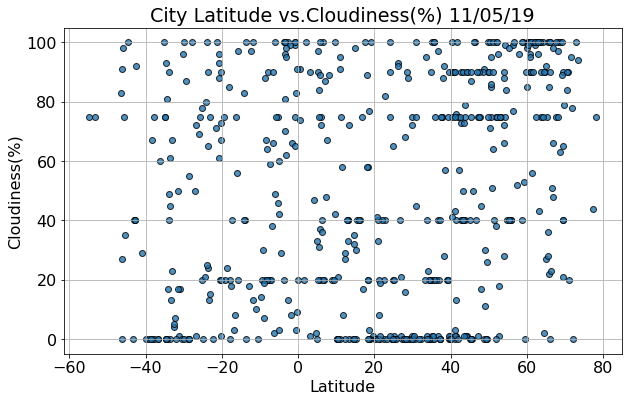

In [174]:
# Build the scatter plot for latitude vs. cloudiness.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

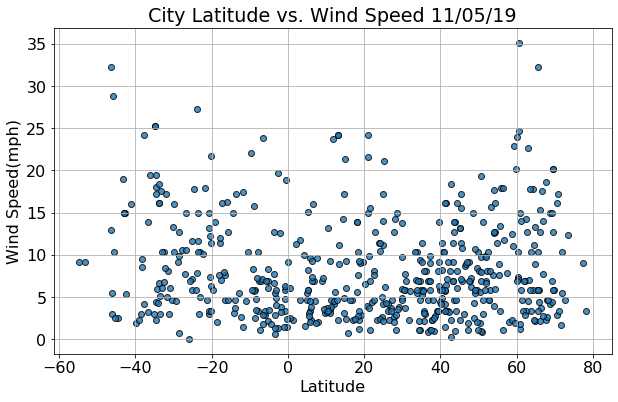

In [175]:
# Build the scatter plot for latitude vs. wind speed.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## Find the Correlation Between Latitude and Maximum Temperature

##### Create a Linear Regression Function

In [176]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
#from scipy import stats

In [194]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
 
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.subplots(figsize=(10, 6))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# To get an output from a function, we need to call the function with the correct number of parameters or
# arguments for the function.


#### Create the Northern Hemisphere DataFrames

In [178]:
# To perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.
# To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.
# The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
#The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].


In [179]:
# Let’s apply this method to our city_data_df DataFrame by adding the code index13 = df.loc[13]
index13 = city_data_df.loc[13]
index13

City                         Sola
Country                        TZ
Date          2019-11-06 00:16:36
Lat                         -3.17
Lng                          33.8
Max Temp                    70.68
Humidity                       67
Cloudiness                     62
Wind Speed                    4.9
Name: 13, dtype: object

In [180]:
# Filter DataFrame based on a value of a row: get all Northern Hemisphere lat, for latitudes greater than or equal to 0

city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
547    False
548    False
549     True
550    False
551     True
Name: Lat, Length: 552, dtype: bool

In [181]:
# To return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2019-11-06 00:16:32,33.93,134.50,59.00,66,40,10.29
1,Butaritari,KI,2019-11-06 00:16:33,3.07,172.79,84.04,76,1,11.74
2,Vostok,RU,2019-11-06 00:16:33,46.45,135.83,15.40,85,100,8.66
4,Cabo San Lucas,MX,2019-11-06 00:15:11,22.89,-109.91,84.99,65,40,12.75
6,Hilo,US,2019-11-06 00:16:35,19.71,-155.08,84.20,66,1,9.17


#### Create the Southern Hemisphere DataFrames

In [182]:
# Filter DataFrame based on a value of a row: get all Southern Hemisphere lat, for latitudes less than 0

city_data_df["Lat"] < 0

0      False
1      False
2      False
3       True
4      False
       ...  
547     True
548     True
549    False
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [183]:
# To return a DataFrame with all data fitting the criteria, for latitudes less than 0, 
# we can use the loc method on the city_data_df

city_data_df.loc[(city_data_df["Lat"] < 0)]
city_data_df.loc[(city_data_df["Lat"] < 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Punta Arenas,CL,2019-11-06 00:16:33,-53.16,-70.91,41.00,100,75,9.17
5,Uchiza,PE,2019-11-06 00:16:34,-8.46,-76.46,66.87,94,67,4.79
7,Avarua,CK,2019-11-06 00:16:35,-21.21,-159.78,75.20,73,100,4.70
8,Jamestown,AU,2019-11-06 00:16:35,-33.21,138.60,68.61,33,13,17.60
13,Sola,TZ,2019-11-06 00:16:36,-3.17,33.80,70.68,67,62,4.90


In [184]:
# Now assign DFs to the variables northern_hemi_df and southern_hemi_df resp., to access the data to perform linear regression.
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

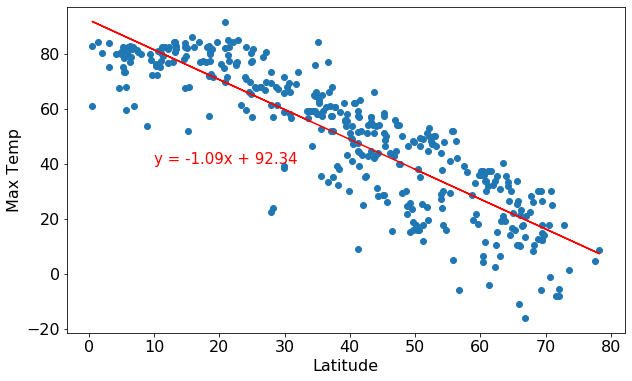

In [209]:
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

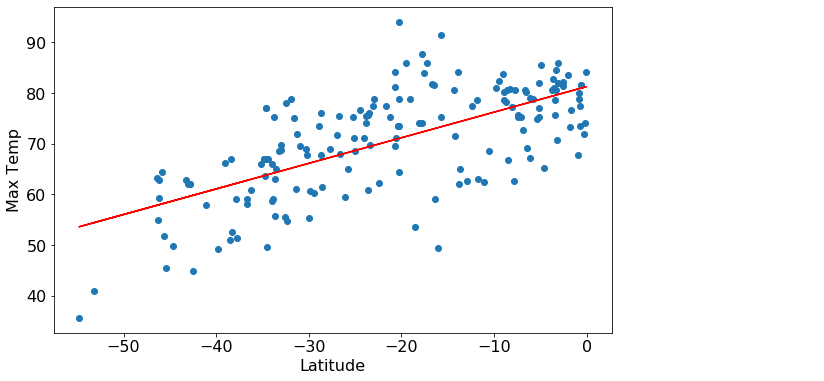

In [196]:
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column
# from the northern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


## Find the Correlation Between Latitude and Percent Humidity


#### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

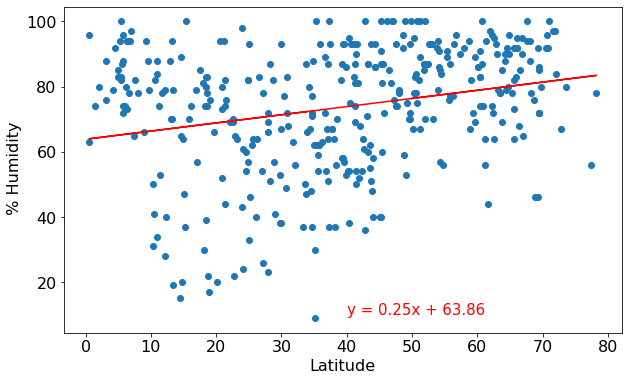

In [203]:
# Set the x values equal to the latitude column and the y values equal to the percent humidity column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Percent Humidity', ' % Humidity',(40,10))

#### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

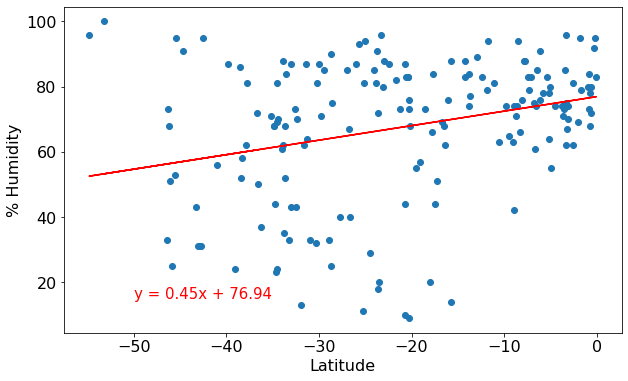

In [205]:
# Set the x values equal to the latitude column and the y values equal to the Percent Humidity column
# from the southern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50, 15))

## Find the Correlation Between Latitude and Percent Cloudiness


##### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

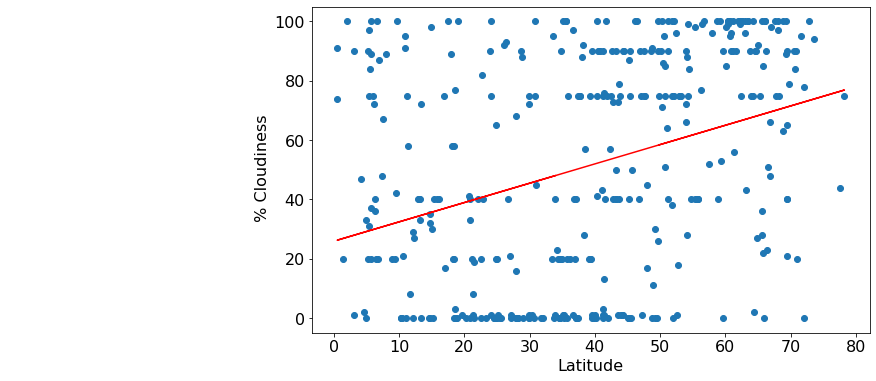

In [206]:
# Set the x values equal to the latitude column and the y values equal to the percent cloudiness column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Percent Cloudiness', ' % Cloudiness',(-50, 60))

#### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

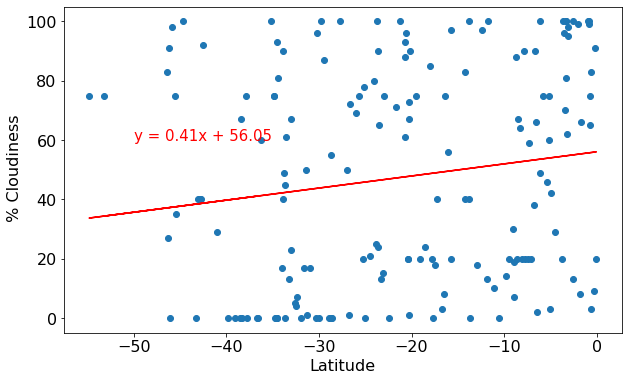

In [210]:
# Set the x values equal to the latitude column and the y values equal to the percent cloudiness column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Percent Cloudiness', ' % Cloudiness',(-50, 60))


## Find the Correlation Between Latitude and Wind Speed


##### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

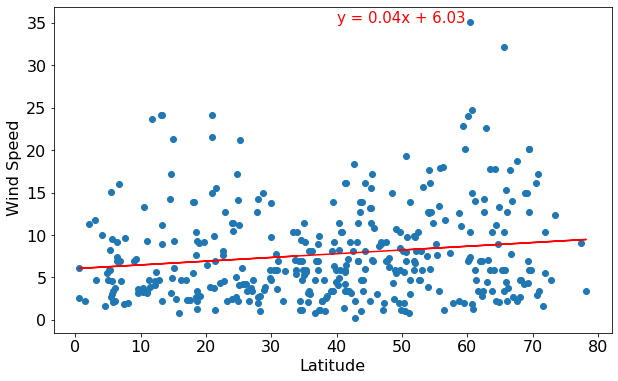

In [214]:
# Set the x values equal to the latitude column and the y values equal to the Wind Speed column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', ' Wind Speed',(40, 35))


#### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

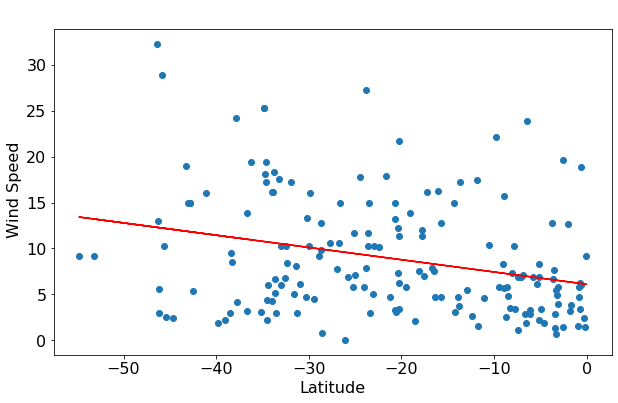

In [215]:
# Set the x values equal to the latitude column and the y values equal to Wind Speed column
# from the southern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', ' Wind Speed',(-50, 35))